In [84]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.autograd import Variable

In [ ]:
df = pd.read_csv('./train.csv', dtype = np.float32)

In [20]:
labels = df.label.values

In [113]:
features = df.loc[:,df.columns != 'label'].values/255 #normalization

In [51]:
features_train, features_val, labels_train, labels_val = train_test_split(features, labels , train_size=.90, random_state=32)

C:\Users\prate\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [52]:
features_train = torch.from_numpy(features_train)
labels_train = torch.from_numpy(labels_train).type(torch.LongTensor)

In [54]:
features_val = torch.from_numpy(features_val)
labels_val = torch.from_numpy(labels_val).type(torch.LongTensor)

In [59]:
trainset  = TensorDataset(features_train, labels_train)
valset = TensorDataset(features_val, labels_val)

In [ ]:
train_loader = torch.utils.data.DataLoader(trainset,  batch_size=5, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=5, shuffle=True)

In [ ]:
data = iter(train_loader)
data.next()[0].shape

In [128]:
len(valset)

AttributeError: 'int' object has no attribute 'type'

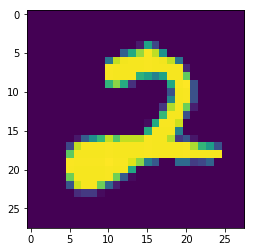

In [68]:
#visualize
plt.imshow(features_train[0].reshape(28,28))

In [70]:
#define module == single layer nn == logistic 
class LogisticRegression(nn.Module):
    def __init__(self, num_input, num_output):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(in_features=num_input, out_features=num_output)
    def forward(self, x):
        return self.linear(x)

In [99]:
#define loss
criteria = nn.CrossEntropyLoss()
net = LogisticRegression(784,10)
optimizer = optim.SGD(net.parameters(), lr = 0.01)

In [ ]:
out = net(Variable(data.next()[0]))

In [95]:
out.data

tensor([[ 0.3363, -0.1877, -0.1123,  0.0150, -0.1622, -0.1003,  0.1452,  0.0587,
          0.0355,  0.1783],
        [-0.1741,  0.0177, -0.1359, -0.0289, -0.3247, -0.1134,  0.1486, -0.2022,
          0.1117, -0.0734],
        [ 0.1497, -0.2949, -0.2185, -0.2036, -0.1050, -0.0415,  0.1510, -0.1311,
          0.1755,  0.1352],
        [ 0.1923,  0.1153, -0.0880, -0.1706, -0.3295, -0.0179,  0.3001,  0.1908,
         -0.0443,  0.2309],
        [-0.0922,  0.0113, -0.1765, -0.0724, -0.2947, -0.0825,  0.1189, -0.0482,
         -0.0234, -0.0532]])

In [97]:
torch.max(out.data,1)

(tensor([0.3363, 0.1486, 0.1755, 0.3001, 0.1189]), tensor([0, 6, 8, 6, 6]))

In [ ]:
train_loss, val_loss, count = [],[],0

In [133]:
vdata = iter(val_loader).next()[0]
vdata = Variable(vdata.view(-1,28*28))
vout = net(vdata)

pred = torch.max(vout.data, 1)[1]
print(pred)
correct += (pred == label).sum().item()
print(label)
print(sum(pred==label).item())
print(correct)
vloss += criteria(vout,label)
val_loss.append(vloss.item())

tensor([0, 5, 3, 3, 6])
tensor([4, 3, 0, 1, 6])
1
tensor(216, dtype=torch.uint8)


In [141]:
epoch = 10
for e in range(epoch):
    for i, (data, label) in enumerate(train_loader):

        data = Variable(data.view(-1,28*28))
        label = Variable(label)
        out = net(data)
        optimizer.zero_grad()
        loss = criteria(out,label)

        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()

        if i % 1000 == 0:
            accuracy, correct = 0,0
            totalvloss = 0
            for vdata,label in val_loader:
                vdata = Variable(vdata.view(-1,28*28))
                vout = net(vdata)
                label = Variable(label)
                pred = torch.max(vout, 1)[1]
                correct += (pred == label).sum()
                vloss = criteria(vout,label)
                totalvloss += vloss.item()
            val_loss.append(totalvloss)

            accuracy = (correct.item()/len(valset))
            print('Epocj {} iteration {} vloss {} Valset accuracy {}'.format(e, i, loss.data, accuracy))    

Epocj 0 iteration 0 vloss 0.16518250107765198 Valset accuracy 0.9171428571428571
Epocj 0 iteration 1000 vloss 0.028889846056699753 Valset accuracy 0.914047619047619
Epocj 0 iteration 2000 vloss 0.13660097122192383 Valset accuracy 0.9152380952380952
Epocj 0 iteration 3000 vloss 1.6563056707382202 Valset accuracy 0.9171428571428571
Epocj 0 iteration 4000 vloss 0.8926874995231628 Valset accuracy 0.9147619047619048
Epocj 0 iteration 5000 vloss 0.013625621795654297 Valset accuracy 0.9176190476190477
Epocj 0 iteration 6000 vloss 0.19921235740184784 Valset accuracy 0.9169047619047619
Epocj 0 iteration 7000 vloss 0.06460390239953995 Valset accuracy 0.9192857142857143
Epocj 1 iteration 0 vloss 0.26659709215164185 Valset accuracy 0.9176190476190477
Epocj 1 iteration 1000 vloss 0.027085017412900925 Valset accuracy 0.915
Epocj 1 iteration 2000 vloss 0.488219678401947 Valset accuracy 0.9166666666666666
Epocj 1 iteration 3000 vloss 0.0874396339058876 Valset accuracy 0.9183333333333333
Epocj 1 iterat

In [142]:
testdf = pd.read_csv('./test.csv', dtype = np.float32)

In [146]:
testdf = testdf/255

In [154]:
i = Variable(torch.from_numpy(testdf.values))

In [157]:
out = net(i.view(-1,28*28))

In [159]:
predictions = torch.max(out,1)[1]

In [164]:
predictions.numpy()

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [163]:
testdf.index.values

array([    0,     1,     2, ..., 27997, 27998, 27999], dtype=int64)

In [168]:
newdf = pd.DataFrame({'ImageId':testdf.index.values+1, 'Label': predictions.numpy()})
newdf.to_csv('./results.csv', index=False)